In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install seaborn은 터미널 안 들어가도 설치 가능?

sns.set_style('whitegrid')

#pandas의 read_csv() 함수 이용 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#train 데이터 확인
print('Train Shape:', train.shape)
train.head()



Train Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 각 컬럼의 데이터타입, 결측치 등 확인
train.info()

# 수치형 열의 기초 통계
train.describe()

# age와 cabin에 결측치 많음
# PassengerId, Survived,Pclass,SibSp,Parch는 정수형
# Age, Fare 는 실수형


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#결측치 확인
train.isnull().sum()
#train.isnull은 참거짓으로 나옴 -> sum으로 ㄱㄱ

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

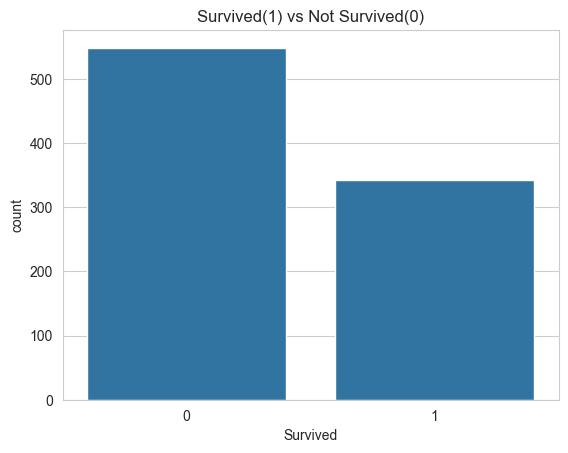

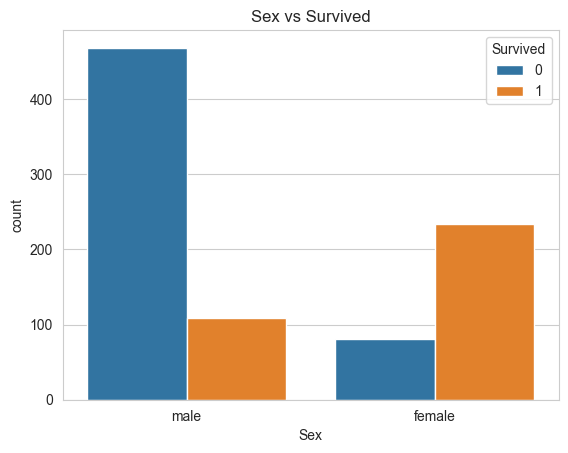

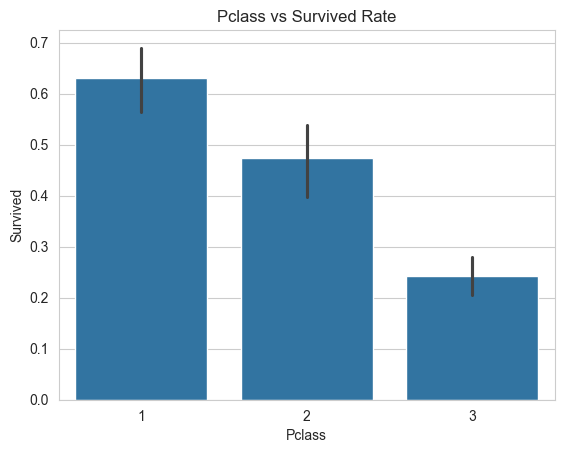

In [5]:
#생존율에 영향을 줄 것 같은 변수들 그래프

sns.countplot(data=train, x='Survived')
plt.title("Survived(1) vs Not Survived(0)")
plt.show()

sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Sex vs Survived")
plt.show()

sns.barplot(data=train, x='Pclass', y='Survived')
plt.title('Pclass vs Survived Rate')
plt.show()



In [6]:
#Age의 결측치 : .mean을 사용 평균값으로 대체
mean_age = train['Age'].mean()
#inplace=True는 train["Age"]내의 값 자체를 대체 True는 원본수정 False는 원본은 유지
train['Age'].fillna(mean_age, inplace=True)
test['Age'].fillna(mean_age, inplace=True)


C:\Users\HKIT\AppData\Local\Temp\ipykernel_11004\9089147.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(mean_age, inplace=True)
C:\Users\HKIT\AppData\Local\Temp\ipykernel_11004\9089147.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [7]:
#Cabin 결측치 : 결측치가 너무 많아 Cabin여부로만 사용 예시
train['CabinYN'] = train['Cabin'].notnull().astype(int)
test['CabinYN'] = test['Cabin'].notnull().astype(int)

#Cabin 제거
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [8]:
#Embarked의 결측치 : 적어서 최빈값으로 대체
#일단 제일 많이 나온 값 찾기
most_common_embarked = train['Embarked'].value_counts().idxmax()
print('Most Common Embarked =', most_common_embarked)

#최빈값으로 대체
train['Embarked'].fillna(most_common_embarked, inplace=True)
test['Embarked'].fillna(most_common_embarked, inplace=True)

Most Common Embarked = S


C:\Users\HKIT\AppData\Local\Temp\ipykernel_11004\2474378559.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(most_common_embarked, inplace=True)
C:\Users\HKIT\AppData\Local\Temp\ipykernel_11004\2474378559.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
#머신러닝은 글자 못 읽음 숫자로 바꿔줘야 -> 인코딩

#Sex : male, female -> 0,1
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

#Emabarked는 원핫인코딩
#drop_first=True는 변수 하나 제거, 왜 C가 없어지냐 : 다중 공선성 S,Q를 확인하면 C는 자동 확인
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,CabinYN,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,False,True


In [10]:
print(train.groupby('Sex')['Survived'].mean())

print(train.groupby('Pclass')['Survived'].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [11]:
#Feature와 Target으로 분리
#Survived는 타깃 PassengerId, Name, Ticket 등은 제외
#생존율과 상관없음

features=['Pclass','Sex','Age','SibSp','Parch','Fare','CabinYN','Embarked_Q', 'Embarked_S']

X=train[features]
Y=train['Survived']

X.head()
Y.head()

       


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape, X_val.shape)

(712, 9) (179, 9)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model=LogisticRegression(max_iter=200)
log_model.fit(X_train,Y_train)

Y_pred_log = log_model.predict(X_val)

acc_log = accuracy_score(Y_val, Y_pred_log)
print("Logistic Regression Accuracy =", acc_log)

cm_log = confusion_matrix(Y_val, Y_pred_log)
print("Confusion Matrix:\n", cm_log)

print("classification Report:\n", classification_report(Y_val, Y_pred_log))




Logistic Regression Accuracy = 0.8212290502793296
Confusion Matrix:
 [[91 14]
 [18 56]]
classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



c:\Users\HKIT\anaconda3\envs\ML_subject\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import RandomForestClassifier

# 1) 모델 생성 & 학습
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, Y_train)

# 2) 예측
Y_pred_rf = rf_model.predict(X_val)

# 3) 평가
acc_rf = accuracy_score(Y_val, Y_pred_rf)
print("Random Forest Accuracy =", acc_rf)

cm_rf = confusion_matrix(Y_val, Y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

print("Classification Report:\n", classification_report(Y_val, Y_pred_rf))

Random Forest Accuracy = 0.8156424581005587
Confusion Matrix:
 [[91 14]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [15]:
print("Logistic Regression Accuracy :", acc_log)
print("Random Forest Accuracy       :", acc_rf)

Logistic Regression Accuracy : 0.8212290502793296
Random Forest Accuracy       : 0.8156424581005587


In [16]:
import scipy.stats as stats
#카이제곱 검정
contingency_table = pd.crosstab(train['Sex'], train['Survived'])

#카이제곱 검정 수행
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)


print('카이제곱검정: ', chi2_stat)
print('p-value:', p_val)
print("degrees of freedom:", dof)
print('expected frequencies table')
print(expected)




카이제곱검정:  260.71702016732104
p-value: 1.1973570627755645e-58
degrees of freedom: 1
expected frequencies table
[[355.52525253 221.47474747]
 [193.47474747 120.52525253]]


In [17]:
#t- 검정
#생존자의 나이 데이터 추출
age_survived = train[train['Survived']==1]['Age']

#비생존자의 나이 데이터 추출
age_not_survived = train[train['Survived']==0]['Age']

#독립표본 t검정 수행
t_stat, t_p_val = stats.ttest_ind(age_survived, age_not_survived, equal_var=False)

print('T-Statistic:' ,t_stat)
print('p-value:', t_p_val)




T-Statistic: -2.0385172031950463
p-value: 0.04189090646311582
